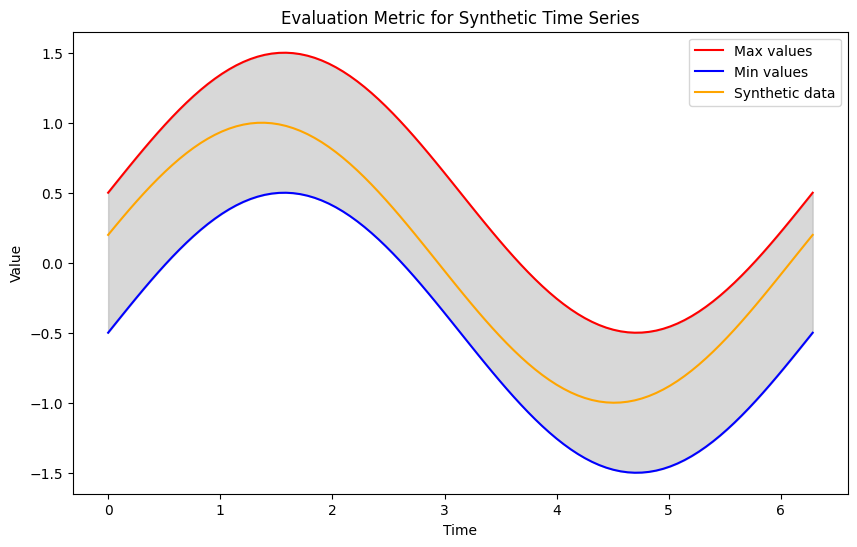

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Generate a periodic time series for real data
t = np.linspace(0, 2 * np.pi, 100)
real_data = np.sin(t)

# Calculate max and min values at each time point (for illustration, we use a constant offset)
max_values = real_data + 0.5
min_values = real_data - 0.5

# Generate synthetic time series with similar periodicity
synthetic_data = np.sin(t + 0.2)  # Shifted sine wave for illustration

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(t, max_values, label='Max values', color='red')
plt.plot(t, min_values, label='Min values', color='blue')
plt.fill_between(t, min_values, max_values, color='gray', alpha=0.3)
plt.plot(t, synthetic_data, label='Synthetic data', color='orange')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Evaluation Metric for Synthetic Time Series')
plt.legend()
plt.show()


In [2]:
def dynamic_time_warping_dist(X, Y, norm=np.linalg.norm):
    N = len(X)
    M = len(Y)
    D = np.zeros((N + 1, M + 1), dtype=float)
    D[:, 0] = np.inf
    D[0, :] = np.inf
    D[0][0] = 0

    for i in range(1, N + 1):
        for j in range(1, M + 1):
            m = min([D[i-1][j], D[i][j-1], D[i - 1][j - 1]])
            D[i][j] = norm(X[i - 1] - Y[j-1]) + m
    
    return D, D[N][M]


In [1]:
from data_utils.dataset import PecanStreetDataset

dataset = PecanStreetDataset()
data = dataset.data
data

series = data.grid

def check_same_length(series):
    # Extract lengths of each list
    lengths = series.apply(len)
    # Check if all lengths are the same
    print(lengths.unique())
    return lengths.nunique() == 1

all_same_length = check_same_length(series)
print("All lists are the same length:", all_same_length)

[96]
All lists are the same length: True
